<a href="https://colab.research.google.com/github/ralsouza/data_visualisation_matplotlib_seaborn_ggplot/blob/master/notebooks/02_python_seaborn_statistical_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sbn
import matplotlib.pyplot as plt
import scipy as spy
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Check version
sbn.__version__

'0.10.1'

In [4]:
# Check datasets into seaborn
sbn.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [0]:
# Load Iris dataset
iris = sbn.load_dataset('iris')

In [9]:
type(iris)

pandas.core.frame.DataFrame

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Making Plots

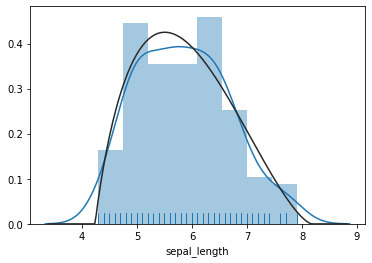

In [16]:
# Histogram with density estimate of kernel - Univariate Distribuition
sbn.distplot(iris.sepal_length,rug=True,fit=spy.stats.gausshyper)

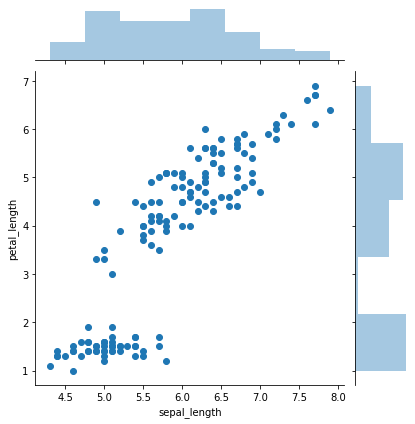

In [17]:
# Scatterplot: Bivariate Distribuition
sbn.jointplot(x='sepal_length',y='petal_length',data=iris)

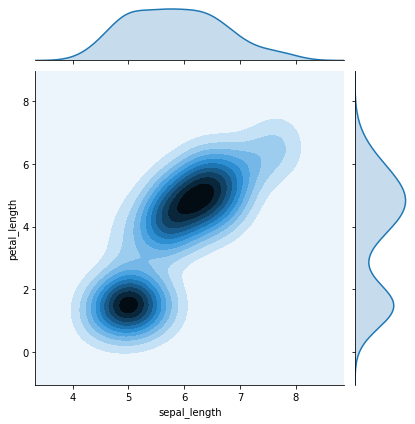

In [18]:
# Scatterplot: Bivariate Distribuition with density (KDE)
sbn.jointplot(x='sepal_length',y='petal_length',data=iris,kind='kde')

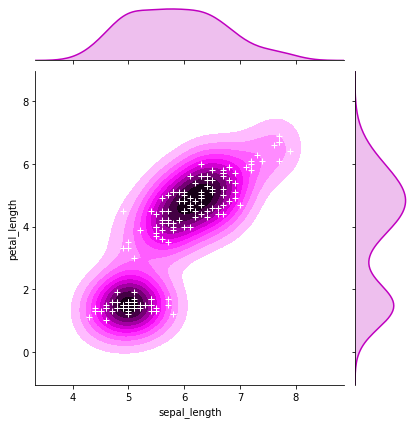

In [20]:
# Scatterplot: Bivariate Distribuition with density (KDE) and data points
g = sbn.jointplot(x = "sepal_length", y = "petal_length", data = iris, kind = "kde", color = "m")
g.plot_joint(plt.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0);

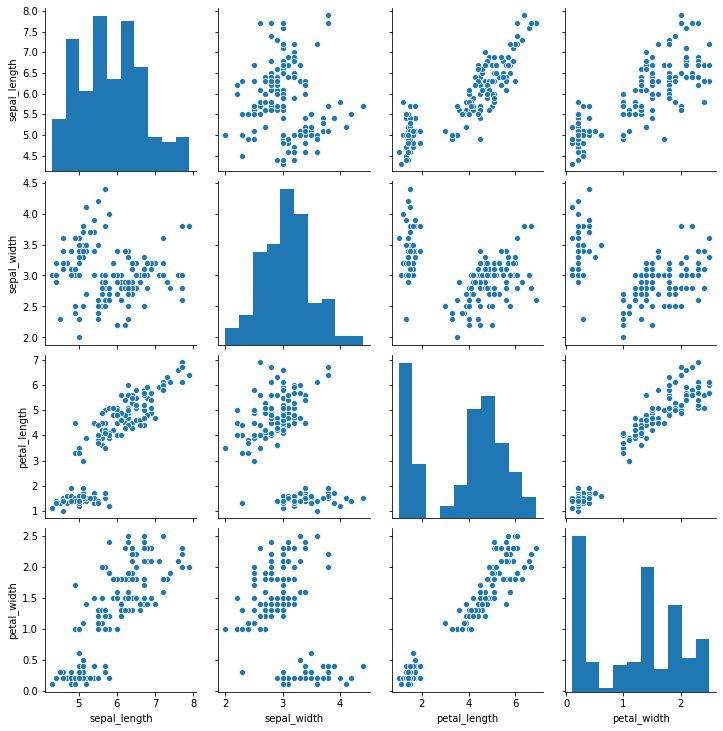

In [22]:
# Correlation between variables
sbn.pairplot(iris)

# Plots with Linear Regression 

In [0]:
# Load tips dataset
tips = sbn.load_dataset('tips')

In [24]:
type(tips)

pandas.core.frame.DataFrame

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


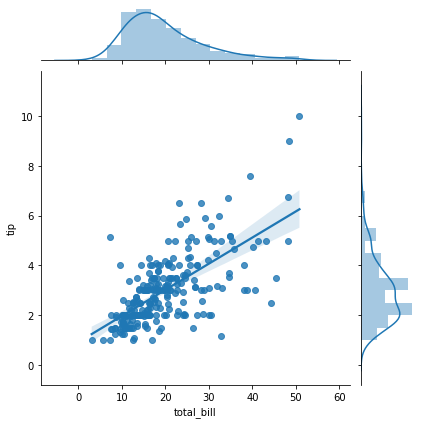

In [27]:
# Scatterplot with linear regression and density distribuition (KDE)
sbn.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

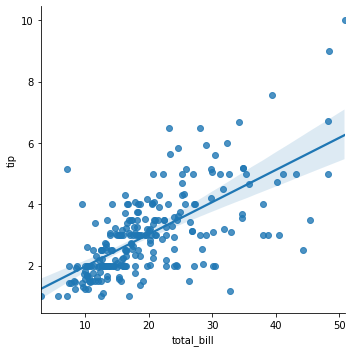

In [28]:
# Linear Regression (using 95% interval confidence by default)
# tip: dependent variable
# total_bill: independent variable
sbn.lmplot(x='total_bill',y='tip',data=tips)

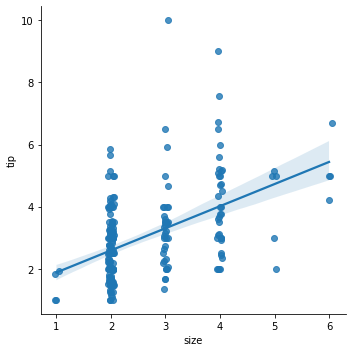

In [30]:
# Change de visualization
sbn.lmplot(x='size',y='tip',data=tips,x_jitter=.05)

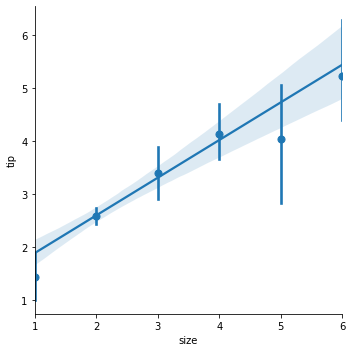

In [31]:
# Using with Numpy
sbn.lmplot(x='size',y='tip',data=tips,x_estimator=np.mean)

# Load anscombe dataset

In [0]:
anscombe = sbn.load_dataset('anscombe')

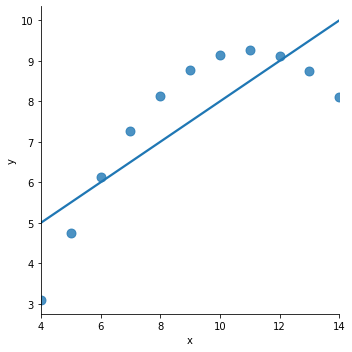

In [34]:
# Non-linear Regression
sbn.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"), ci = None, scatter_kws = {"s": 80});

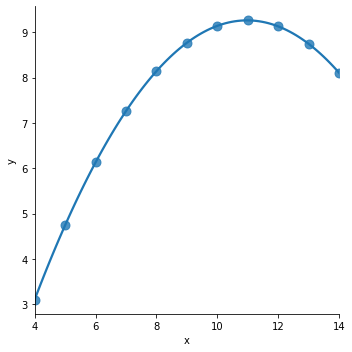

In [35]:
# Adjusting the curve
sbn.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"), order = 2, ci = None, scatter_kws = {"s": 80});

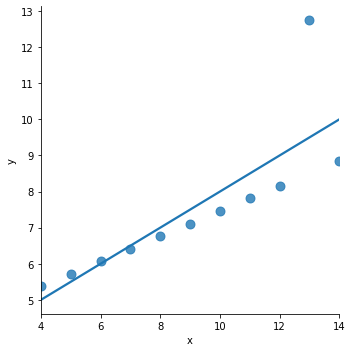

In [36]:
# Checking the outliers
sbn.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'III'"), ci = None, scatter_kws = {"s": 80});

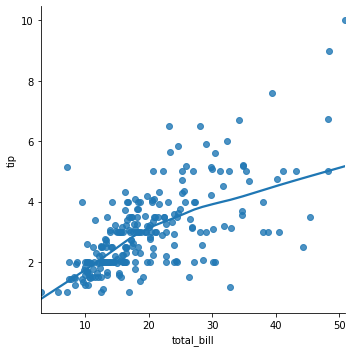

In [37]:
# Using the lowess smoother to non-linear variables
sbn.lmplot(x = "total_bill", y = "tip", data = tips, lowess = True);

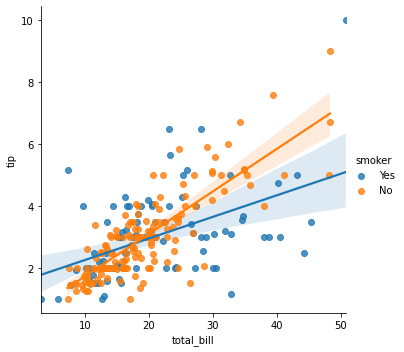

In [38]:
# Two or more variables
sbn.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = tips);

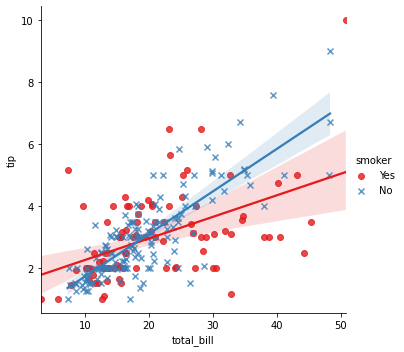

In [39]:
# Customizing data points
sbn.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = tips, markers = ["o", "x"], palette = "Set1");

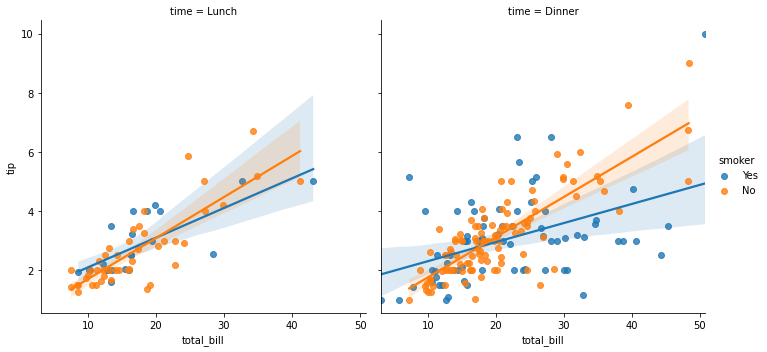

In [40]:
# Dividing plots
sbn.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = tips)

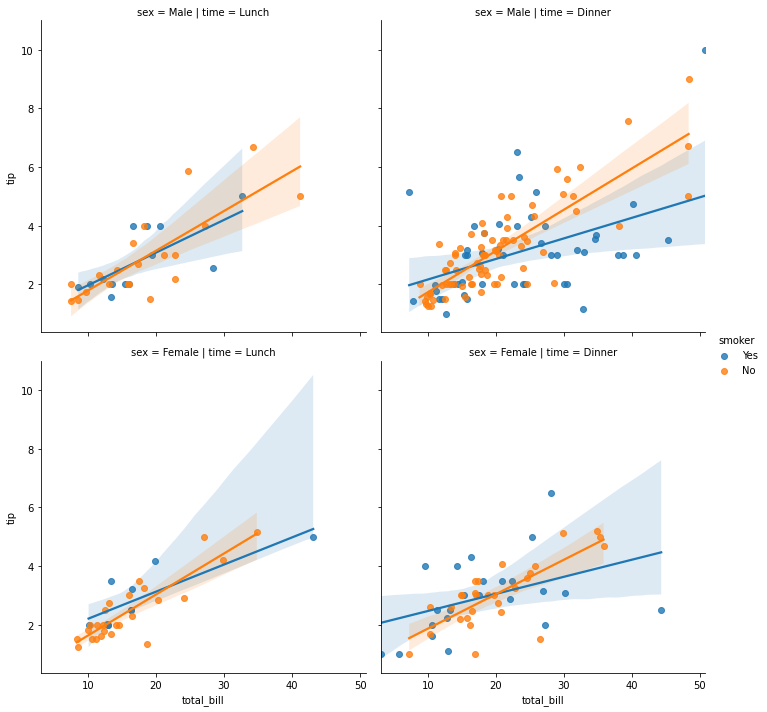

In [41]:
sbn.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = tips);

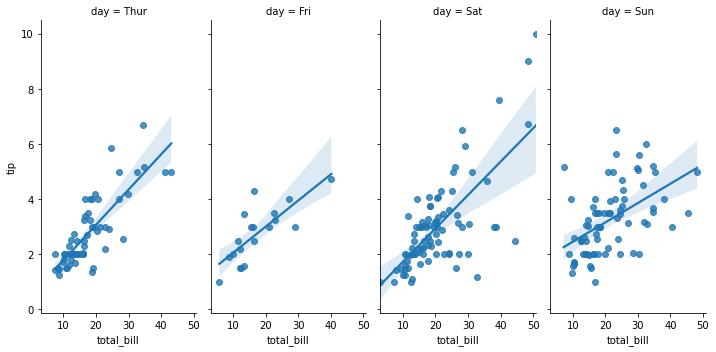

In [42]:
# Divide by days of week
sbn.lmplot(x = "total_bill", y = "tip", col = "day", data = tips, aspect = .5);

# Plots to Categorical Variables

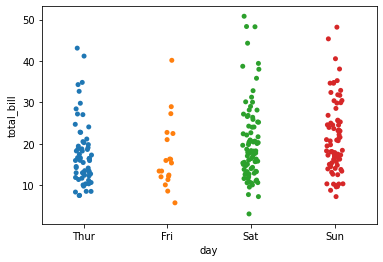

In [43]:
# Stripplot
sbn.stripplot(x = "day", y = "total_bill", data = tips);

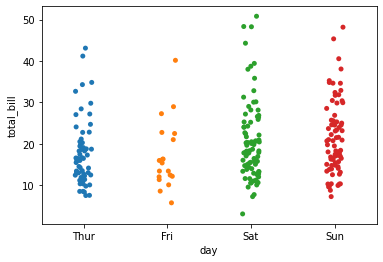

In [44]:
sbn.stripplot(x = "day", y = "total_bill", data = tips, jitter = True);

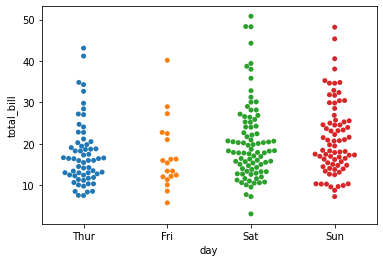

In [45]:
# Swarmplot - Avoiding data overlaping
sbn.swarmplot(x = "day", y = "total_bill", data = tips);

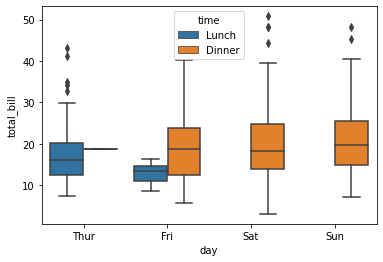

In [46]:
# Boxplot
sbn.boxplot(x = "day", y = "total_bill", hue = "time", data = tips);

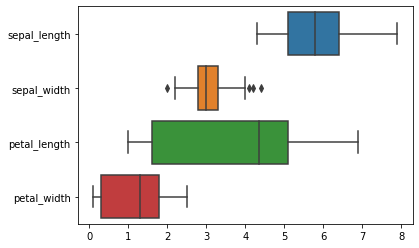

In [47]:
# Boxplot - Horizontal
sbn.boxplot(data = iris, orient = "h");

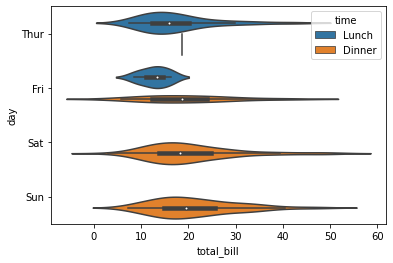

In [48]:
# Violin plot
sbn.violinplot(x = "total_bill", y = "day", hue = "time", data = tips)

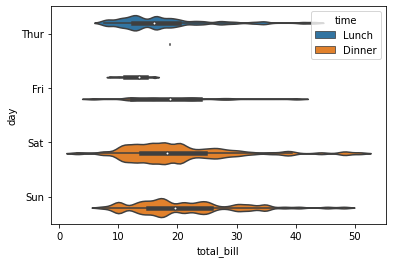

In [49]:
sbn.violinplot(x = "total_bill", y = "day", hue = "time", data = tips, bw = .1, scale = "count", scale_hue = False)

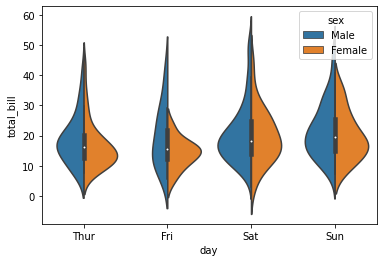

In [50]:
sbn.violinplot(x = "day", y = "total_bill", hue = "sex", data = tips, split = True)

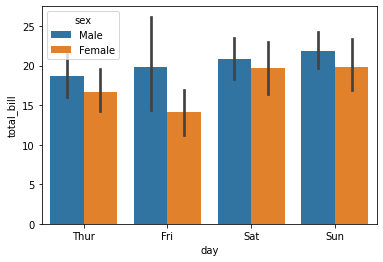

In [51]:
# Barplot with mean
sbn.barplot(x = "day", y = "total_bill", hue = "sex", data = tips)

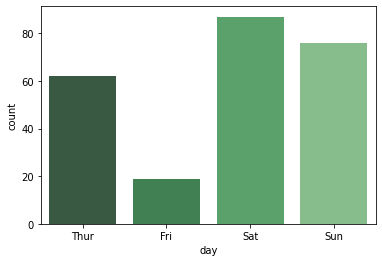

In [52]:
# Countplot
sbn.countplot(x = "day", data = tips, palette = "Greens_d")

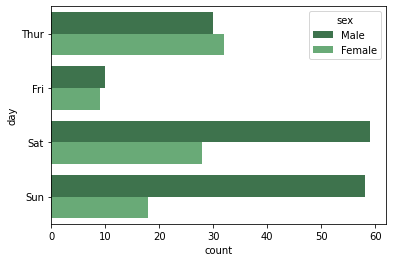

In [53]:
# Countplot horizontal
sbn.countplot(y = "day", hue = "sex", data = tips, palette = "Greens_d")

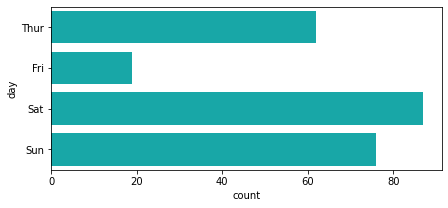

In [55]:
# Barplot
f, ax = plt.subplots(figsize=(7, 3))
sbn.countplot(y = "day", data = tips, color = "c");

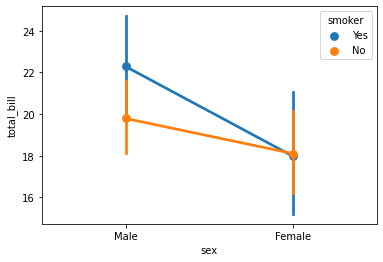

In [56]:
# Pointplot
sbn.pointplot(x = "sex", y = "total_bill", hue = "smoker", data = tips)

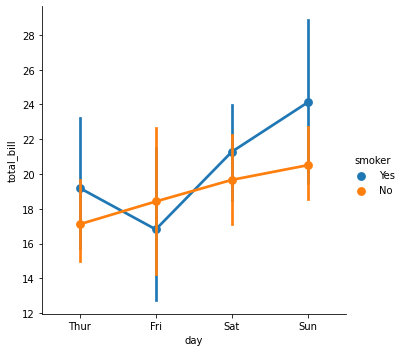

In [57]:
# Factorplot
sbn.factorplot(x = "day", y = "total_bill", hue = "smoker", data = tips)

# Visualizing data with Pandas and Seaborn

In [0]:
import random
import pandas as pd

In [0]:
df = pd.DataFrame()

In [0]:
# Aleatory ranges
df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

In [61]:
df.head()

,x,y
0,74,59
1,17,64
2,36,99
3,91,5
4,54,8


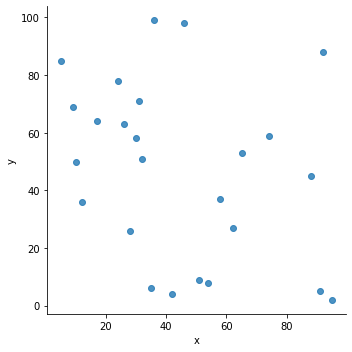

In [62]:
# Only data points
sbn.lmplot('x', 'y', data = df, fit_reg = False)

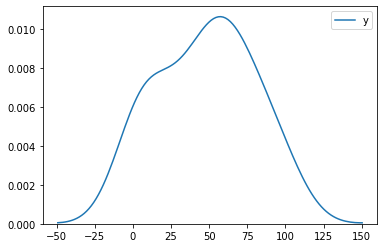

In [64]:
# Density plot (kde)
sbn.kdeplot(df.y)

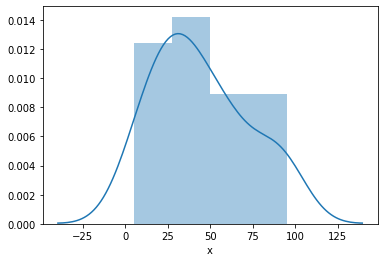

In [65]:
# Distplot
sbn.distplot(df.x)

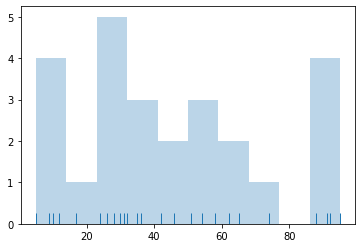

In [66]:
# Histogram
# Histograma
plt.hist(df.x, alpha = .3)
sbn.rugplot(df.x);

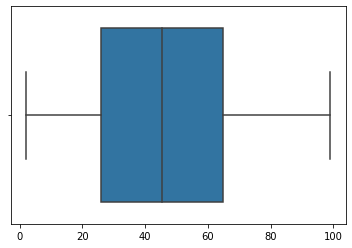

In [67]:
# Boxplot
sbn.boxplot([df.y, df.x])

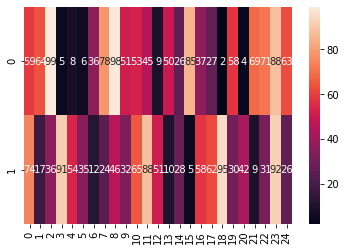

In [68]:
# Heatmap
sbn.heatmap([df.y, df.x], annot = True, fmt = "d")

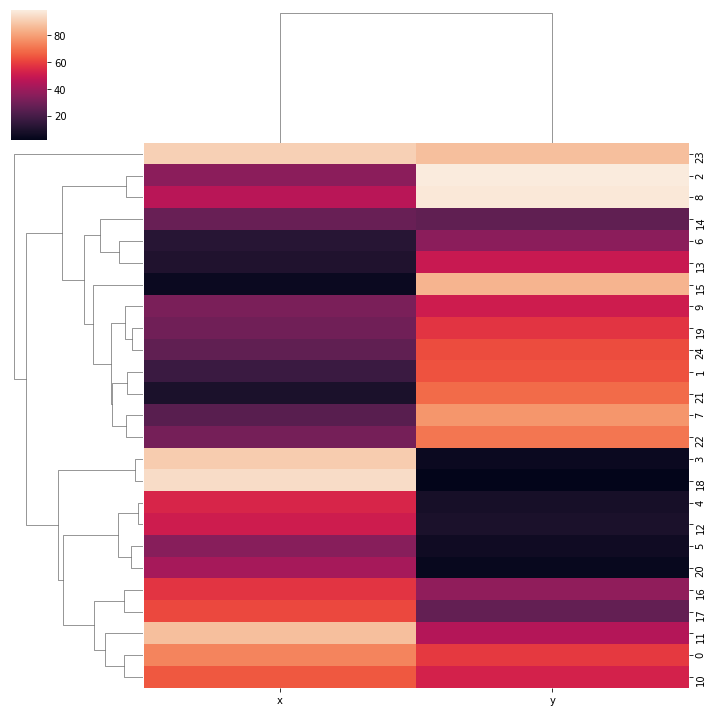

In [69]:
# Clustermap
sbn.clustermap(df)